<a href="https://colab.research.google.com/github/fstoco/machine-learning/blob/main/kmeans_sas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means Clustering 

Understanding the K-Means Algorithm
Conventional k-means requires only a few steps. The first step is to randomly select k centroids, where k is equal to the number of clusters you choose. Centroids are data points representing the center of a cluster.

The main element of the algorithm works by a two-step process called expectation-maximization. The expectation step assigns each data point to its nearest centroid. Then, the maximization step computes the mean of all the points for each cluster and sets the new centroid. Here’s what the conventional version of the k-means algorithm looks like:

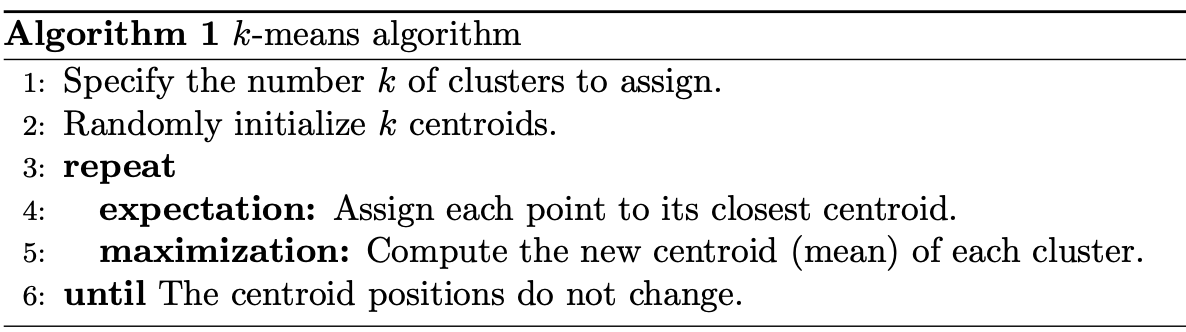

The quality of the cluster assignments is determined by computing the sum of the squared error (SSE) after the centroids converge, or match the previous iteration’s assignment. The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid. Since this is a measure of error, the objective of k-means is to try to minimize this value.

In [ ]:
import pandas as pd

df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
    header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
       'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
       'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines','Proline']

In [ ]:
from sklearn.model_selection import train_test_split
X = df_wine.iloc[:, 1:].values
y= df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
df=df_wine[['Alcohol', 'Malic acid']]

In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

[[13.0390566   3.83433962]
 [12.98432     1.7012    ]]


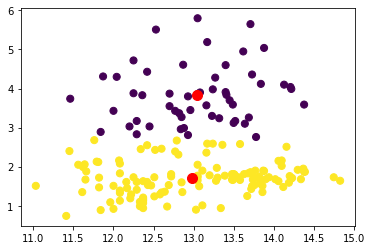

In [ ]:
 
  
kmeans = KMeans(n_clusters=2).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Alcohol'], df['Malic acid'], c= kmeans.labels_.astype(float), s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100)
plt.show()

Choosing the Appropriate Number of Clusters
In this section, you’ll look at two methods that are commonly used to evaluate the appropriate number of clusters:


1.   The elbow method

2.   The silhouette coefficient




In [ ]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
   kmeans = KMeans(n_clusters=k)
   kmeans.fit(df)
   sse.append(kmeans.inertia_)

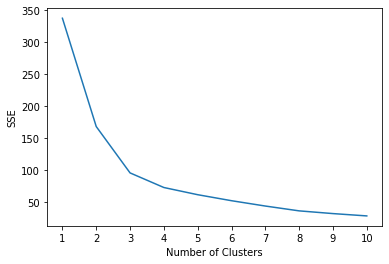

In [ ]:
 
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
!pip install kneed

In [ ]:

from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [ ]:
# second solution 

from sklearn.metrics import silhouette_score, adjusted_rand_score
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
     kmeans = KMeans(n_clusters=k)
     kmeans.fit(df)
     score = silhouette_score(df, kmeans.labels_)
     silhouette_coefficients.append(score)


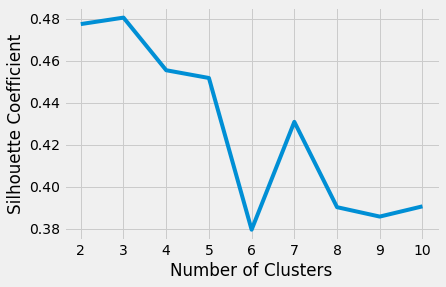

In [ ]:

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()